In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import copy
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target.reshape(-1,1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [3]:
# Encode label into one-hot vectors
enc = OneHotEncoder()
y_train_onehot = enc.fit_transform(y_train).toarray()
y_test_onehot = enc.fit_transform(y_test).toarray()


In [4]:
def softmax(Z):
    '''
        Z: (NxC)
        return: A: (NxC)
    '''
    e_z = np.exp(Z)
    A = e_z/e_z.sum(axis=1).reshape(-1,1)
    return A
def loss(X, Y, W):
    '''
        X: Nxp
        Y: NxC
        W: pxC
        return: float
    '''
    A = softmax(X.dot(W))
    return -np.sum(Y * np.log(A))

In [5]:
def grad(X, Y, W):
    '''
        X: Nxp
        Y: NxC
        W: pxC
        return: pxC
    '''
    A = softmax(X.dot(W))    
    E = A-Y # NxC
    return X.T.dot(E)

In [6]:
class softmax_regression:
    def __init__(self, lr=1e-4, epochs=1000,fit_intercept=True,normalize=True):
        self.lr = lr
        self.epochs = epochs
        self.fit_inter = fit_intercept
        self.normalize = normalize
        
    def fit(self, X, Y):
        pass
        self.X = copy.deepcopy(X)
        self.Y = copy.deepcopy(Y)
        
        #Normalizaition
        if self.normalize==True:
            min=np.min(self.X,axis=0)
            max=np.max(self.X,axis=0)
            self.X=(self.X-min)/(max-min)
            self.X=(self.X-min)/(max-min)
        
        if self.fit_inter==True:
            self.X = np.concatenate([np.ones([X.shape[0],1]),X],axis=1)
            
        self.W = np.random.randn(self.X.shape[1], self.Y.shape[1])
        self.BGD()
    def BGD(self):
        pass
        self.list_W = []
        self.hist = []
        for i in range(self.epochs):
            self.W = self.W - self.lr * grad(self.X, self.Y, self.W)
            cost = loss(self.X, self.Y, self.W)
            print(f'Loss at {i}th epoch {cost}')
            self.list_W.append(self.W)
            self.hist.append(cost)
            
    def predict(self, X):
        if self.fit_inter == True:
            X = np.concatenate([np.ones([X.shape[0],1]),X],axis=1)
        return np.argmax(softmax(X.dot(self.list_W[-1])),axis=1)
    
    def predict_proba(self, X):
        if self.fit_inter == True:
            X = np.concatenate([np.ones([X.shape[0],1]),X],axis=1)
        return softmax(X.dot(self.list_W[-1]))
    
    def score(self, X, y):
        if self.fit_inter == True:
            X = np.concatenate([np.ones([X.shape[0],1]),X],axis=1)
        pred = np.argmax(softmax(X.dot(self.list_W[-1])),axis=1)
        return np.mean(pred == np.argmax(y,axis=1))
    
    def history(self, ax):
        '''
            Plot a visualization for the loss function
        '''
        pass
        ax.plot(self.hist)

In [7]:
model = softmax_regression(lr=0.01,epochs=1000,fit_intercept=True,normalize=True)
model.fit(X_train, y_train_onehot)
print('\nFinal weight: \n',model.list_W[-1])

Loss at 0th epoch 955.5470917859477
Loss at 1th epoch 573.7895160981134
Loss at 2th epoch 2442.198722963648
Loss at 3th epoch 1538.0879812737533
Loss at 4th epoch 1497.9114087371777
Loss at 5th epoch 2386.398989931895
Loss at 6th epoch 774.6992383654933
Loss at 7th epoch 828.6289388789874
Loss at 8th epoch 1062.5855442791446
Loss at 9th epoch 464.93289218950946
Loss at 10th epoch 1280.0598240033937
Loss at 11th epoch 224.27430291439745
Loss at 12th epoch 1427.1294850812571
Loss at 13th epoch 117.81149366057855
Loss at 14th epoch 1144.178246223501
Loss at 15th epoch 540.9984626939349
Loss at 16th epoch 1166.5569118664312
Loss at 17th epoch 259.23539335973396
Loss at 18th epoch 1384.3216854270213
Loss at 19th epoch 33.431739060614674
Loss at 20th epoch 591.2781170964306
Loss at 21th epoch 948.4326877681852
Loss at 22th epoch 1210.9228631262404
Loss at 23th epoch 447.39616846122766
Loss at 24th epoch 958.391164299507
Loss at 25th epoch 619.6887498072095
Loss at 26th epoch 803.684912311002

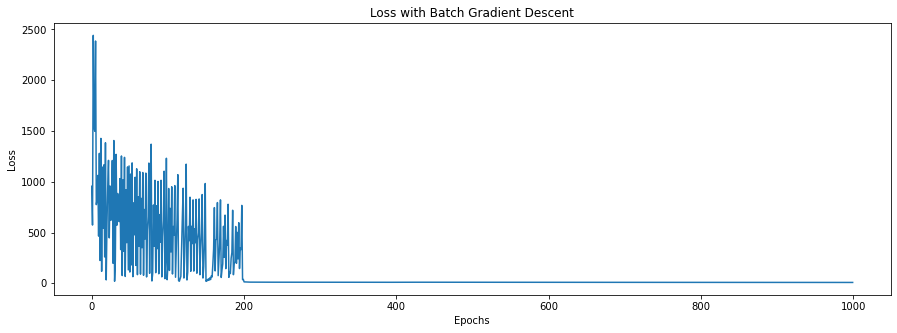

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
model.history(ax)
ax.set_title('Loss with Batch Gradient Descent')
ax.set_ylabel('Loss')
ax.set_xlabel('Epochs')
plt.show()

In [9]:
# Prediction of first 5 samples.
pred_proba = model.predict_proba(X_test)
pred = model.predict(X_test)
print('First 5 samples:')
print('+ Prediction as probability: \n',pred_proba[0:5,:])
print('+ Prediction as classification: \n', pred[0:5])

First 5 samples:
+ Prediction as probability: 
 [[2.22038212e-07 9.99937675e-01 6.21025166e-05]
 [9.99997638e-01 2.36210405e-06 5.18616494e-41]
 [6.65360832e-27 1.25266699e-13 1.00000000e+00]
 [3.34548775e-06 9.99497836e-01 4.98818701e-04]
 [3.10685380e-07 9.99993609e-01 6.08065390e-06]]
+ Prediction as classification: 
 [1 0 2 1 1]


In [10]:
# Accuracy on test set
score = model.score(X_test, y_test_onehot)
print(f'Model accuracy: {score}')

Model accuracy: 0.98


In [11]:
# Softmax Regression with Sklearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1e5, 
        solver = 'lbfgs', multi_class = 'multinomial').fit(X_train, y_train)
print(f'Sklearn model accuracy: {clf.score(X_test,y_test)}')

Sklearn model accuracy: 0.98
